# Instrucciones del proyecto
1. Prepara los datos

1.1. Abre los archivos y examina los datos.

Ruta de acceso a los archivos:


/datasets/gold_recovery_train.csv

/datasets/gold_recovery_test.csv

/datasets/gold_recovery_full.csv


1.2. Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

1.3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

1.4. Realiza el preprocesamiento de datos.

2. Analiza los datos

2.1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

2.2. Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

2.3. Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

3. Construye el modelo

3.1. Escribe una función para calcular el valor final de sMAPE.

3.2. Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

Utiliza estas fórmulas para las métricas de evaluación:

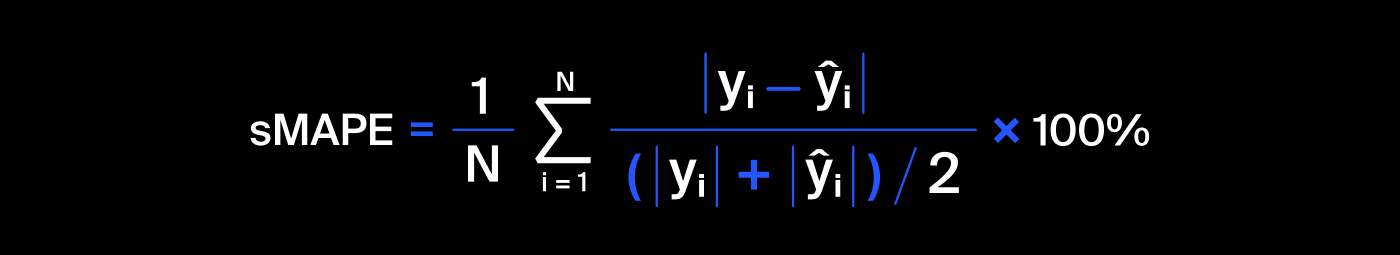

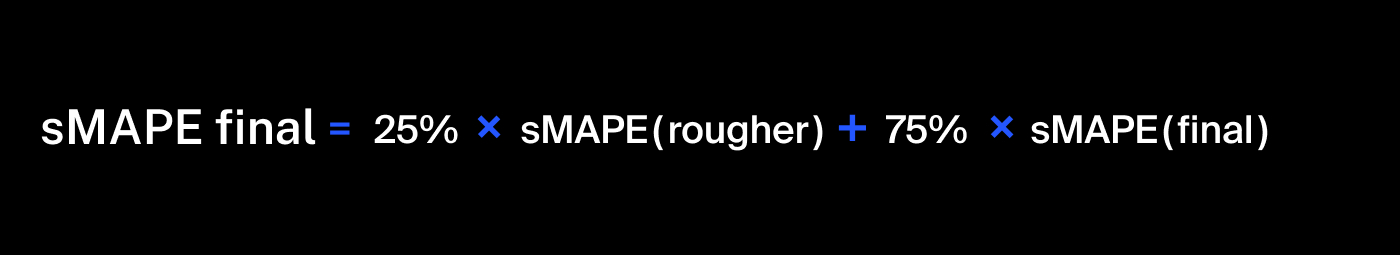

Evaluación del proyecto
Hemos definido los criterios de evaluación para el proyecto. Léelos con atención antes de pasar al ejercicio.

Esto es lo que los revisores buscarán cuando evalúen tu proyecto:

* ¿Has preparado y analizado los datos adecuadamente?
* ¿Qué modelos has desarrollado?
* ¿Cómo has comprobado la calidad del modelo?
* ¿Has seguido todos los pasos de las instrucciones?
* ¿Has respetado la estructura del proyecto y explicado los pasos realizados?
* ¿Cuáles son tus hallazgos?
* ¿Has mantenido el código limpio y has evitado su duplicación?

Ya tienes las hojas informativas y los resúmenes de los capítulos anteriores, así que ya puedes empezar.

¡Buena suerte!

In [10]:
import pandas as pd  # Importa la librería pandas para manipulación y análisis de datos.
import numpy as np  # Importa la librería numpy para operaciones numéricas y matemáticas.
import matplotlib.pyplot as plt  # Importa matplotlib para la creación de gráficos y visualizaciones.
import seaborn as sns  # Importa seaborn para visualizaciones estadísticas mejoradas.

# Importa módulos de scikit-learn para preprocesamiento, selección de modelos y métricas.
from sklearn.model_selection import train_test_split, cross_val_score  # Para dividir datos y validación cruzada.
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal.
from sklearn.tree import DecisionTreeRegressor  # Modelo de árbol de decisión para regresión.
from sklearn.ensemble import RandomForestRegressor  # Modelo de bosque aleatorio para regresión.
from sklearn.metrics import mean_squared_error, make_scorer  # Métricas para evaluar modelos.
from sklearn.preprocessing import StandardScaler  # Para escalar características.

# Preparar los datos

## Abrir los archivos y examinar los datos

In [11]:
url_1 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_full.csv"
url_2 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_test.csv"
url_3 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_13/data/gold_recovery_train.csv"

In [12]:
def explorar_dataset(df):
    """
    Explora un DataFrame mostrando información clave.

    Esta función imprime: información general del DataFrame (df.info()),
    sus dimensiones (df.shape), las primeras 15 filas (df.head(15)),
    estadísticas descriptivas (df.describe()), el conteo de valores nulos
    (df.isnull().sum()) y el conteo de filas duplicadas (df.duplicated().sum()).

    Parámetros:
        df (pd.DataFrame): El DataFrame a explorar.
    """

    print('---' * 10, '\n', f'Información del dataframe') # Imprime un encabezado para la sección de información.
    print(df.info()) # Muestra un resumen conciso del DataFrame, incluyendo tipos de datos y valores no nulos.
    print('---' * 10, '\n', f'Dimensiones del dataframe') # Imprime un encabezado para las dimensiones.
    print(df.shape) # Muestra el número de filas y columnas del DataFrame.
    print('---' * 10, '\n', f'Valores nulos del dataframe') # Imprime un encabezado para los valores nulos.
    print(df.isnull().sum() / len(df) * 100) # Calcula y muestra el porcentaje de valores nulos por columna.
    print('---' * 10, '\n', f'Valores duplicados del dataframe') # Imprime un encabezado para los valores duplicados.
    print(df.duplicated().sum()) # Muestra el número de filas duplicadas en el DataFrame.
    print('---' * 10) # Imprime un separador al final.

In [51]:
gold_recovery_full = pd.read_csv(url_1) # Carga el conjunto de datos completo.
gold_recovery_test = pd.read_csv(url_2) # Carga el conjunto de datos de prueba.
gold_recovery_train = pd.read_csv(url_3) # Carga el conjunto de datos de entrenamiento.

In [14]:
explorar_dataset(gold_recovery_full)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail

In [15]:
explorar_dataset(gold_recovery_test)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floa

In [16]:
explorar_dataset(gold_recovery_train)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail

## Rougher.output.recovery calculo y EAM

In [17]:
def recovery(C, F, T):
    """
    Calcula el porcentaje de recuperación metalúrgica.

    Esta función aplica la fórmula de recuperación:
        recovery = (C * (F - T)) / (F * (C - T)) * 100

    Posteriormente, se reemplazan por valores nulos (NaN) aquellos
    resultados que sean menores a 0 o mayores a 100, ya que se
    consideran físicamente no válidos.

    Parámetros:
        C (array-like o pd.Series): Concentración del concentrado.
        F (array-like o pd.Series): Concentración de la alimentación.
        T (array-like o pd.Series): Concentración de la cola.

    Retorna:
        recovery (array-like o pd.Series): Porcentaje de recuperación válido.
    """

    recovery = (C * (F - T)) / (F * (C - T)) * 100

    recovery[recovery < 0] = np.nan  # Reemplaza valores de recuperación negativos con NaN.
    recovery[recovery > 100] = np.nan  # Reemplaza valores de recuperación mayores a 100 con NaN.

    return recovery


![image](https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.2.3ES.png)

Donde:

-   **C:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en el concentrado justo después de la flotación o
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro después de la purificación.
-   **F:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en la alimentación antes de la flotación
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro en el concentrado justo después de la flotación.
-   **T:**
    -   Para saber la recuperación del concentrado rougher  **→**  la proporción de oro en las colas rougher justo después de la flotación.
    -   Para saber la recuperación del concentrado final  **→**  la proporción de oro después de la purificación.

In [52]:
C_ror = gold_recovery_full['rougher.output.concentrate_au'] # Concentración de oro en el concentrado rougher.
F_ror = gold_recovery_full['rougher.input.feed_au'] # Concentración de oro en la alimentación rougher.
T_ror = gold_recovery_full['rougher.output.tail_au'] # Concentración de oro en las colas rougher.

In [53]:
df_aem = pd.DataFrame() # Crea un DataFrame vacío para almacenar los valores de recuperación y MAE.
df_aem['rougher.output.recovery.calculated'] = recovery(C_ror, F_ror, T_ror) # Calcula la recuperación rougher utilizando la función 'recovery'.

In [54]:
df_aem['rougher.output.recovery'] = gold_recovery_full['rougher.output.recovery'] # Añade la columna de recuperación rougher original del DataFrame completo.

In [55]:
from sklearn.metrics import mean_absolute_error # Importa la función de error absoluto medio (MAE) de scikit-learn.

In [56]:
df_aem.fillna(0, inplace=True) # Rellena los valores NaN en el DataFrame 'df_aem' con 0. Esto es para evitar errores en el cálculo del MAE.

In [57]:
mae = mean_absolute_error(df_aem['rougher.output.recovery'], df_aem['rougher.output.recovery.calculated']) # Calcula el MAE entre los valores de recuperación reales y calculados.
print(f"El error absoluto medio (MAE) es: {mae}") # Imprime el valor del MAE.

El error absoluto medio (MAE) es: 8.497257797509997e-15


## Analizar las caracteristicas no disponibles en el conjunto de prueba

In [58]:
columns_test = gold_recovery_test.columns # Obtiene los nombres de las columnas del DataFrame de prueba.
columns_train = gold_recovery_train.columns # Obtiene los nombres de las columnas del DataFrame de entrenamiento.

In [59]:
columns_full = gold_recovery_full.drop(columns=columns_test) # Crea un DataFrame 'columns_full' eliminando las columnas presentes en 'gold_recovery_test' del DataFrame 'gold_recovery_full'.

In [60]:
columns_full.info() # Muestra información concisa sobre el DataFrame 'columns_full', incluyendo tipos de datos y valores no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                                22635 non-null  float64


## Preprocesamiento de datos

In [61]:
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date']) # Convierte la columna 'date' del DataFrame 'gold_recovery_full' a tipo datetime.
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date']) # Convierte la columna 'date' del DataFrame 'gold_recovery_test' a tipo datetime.
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date']) # Convierte la columna 'date' del DataFrame 'gold_recovery_train' a tipo datetime.

In [62]:
from scipy.stats import normaltest # Importa la función 'normaltest' del módulo 'scipy.stats' para realizar pruebas de normalidad.

In [29]:
def fill_nas(df):
    """
    Rellena los valores nulos de un DataFrame según la distribución de los datos.

    Esta función identifica las columnas de tipo float64 y evalúa si sus valores
    siguen una distribución normal utilizando la prueba de normalidad de D’Agostino.
    Si la distribución es normal (p > 0.05), los valores nulos se reemplazan por
    la media; en caso contrario, se reemplazan por la mediana.

    La imputación se realiza sin modificar el DataFrame original.

    Parámetros:
        df (pd.DataFrame): DataFrame con valores nulos a imputar.

    Retorna:
        df_filled (pd.DataFrame): Nuevo DataFrame con valores nulos imputados.
    """

    df_filled = df.copy()  # Crea una copia del DataFrame para evitar modificar el original.

    columns = [n for n in df_filled.columns if df_filled[n].dtype == "float64"]  # Filtra las columnas numéricas (float64).

    alpha = 0.05  # Nivel de significancia para la prueba de normalidad.

    for column in columns:
        # Realiza la prueba de normalidad de D'Agostino para la columna actual.
        stat, p = normaltest(df_filled[column].dropna())  # dropna() para excluir NaN de la prueba

        if p > alpha:  # Si p-value > alpha, la distribución es considerada normal.
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())  # Rellena NaN con la media.
        else:  # Si p-value <= alpha, la distribución no es normal.
            df_filled[column] = df_filled[column].fillna(df_filled[column].median())  # Rellena NaN con la mediana.

    return df_filled

In [63]:
gold_recovery_full = fill_nas(gold_recovery_full) # Rellena los valores nulos en 'gold_recovery_full' utilizando la función 'fill_nas'.
gold_recovery_full.info() # Muestra la información del DataFrame 'gold_recovery_full' después de rellenar los valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                                22716 non-null  float64       
 7   final.output.tail_pb                                22716 non-null  float64       
 8   final.

In [64]:
gold_recovery_test = fill_nas(gold_recovery_test) # Rellena los valores nulos en 'gold_recovery_test' utilizando la función 'fill_nas'.
gold_recovery_test.info() # Muestra la información del DataFrame 'gold_recovery_test' después de rellenar los valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

In [65]:
gold_recovery_train = fill_nas(gold_recovery_train) # Rellena los valores nulos en 'gold_recovery_train' utilizando la función 'fill_nas'.
gold_recovery_train.info() # Muestra la información del DataFrame 'gold_recovery_train' después de rellenar los valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

# Analiza los datos

In [33]:
elementos = {
    "Oro": "au",
    "Plata": "ag",
    "Plomo": "pb"
}

## Cambios en la concentración de metales

In [67]:
from matplotlib import legend # Importa la función 'legend' de matplotlib.

In [35]:
def graficar_concentraciones(df, elemento):
    """
    Grafica la distribución y el boxplot de las concentraciones de un elemento
    a lo largo de las distintas etapas del proceso.

    Esta función construye dos gráficos:
    - Un histograma con curva KDE para visualizar la distribución de las
      concentraciones del elemento en cada etapa.
    - Un boxplot para comparar la dispersión y presencia de valores atípicos
      entre dichas etapas.

    Las etapas consideradas son:
        - Alimentación (feed)
        - Concentrado del rougher
        - Concentrado del limpiador primario
        - Concentrado final

    Parámetros:
        df (pd.DataFrame): DataFrame que contiene las columnas de concentración.
        elemento (str): Nombre del elemento químico (por ejemplo, 'au', 'ag', 'pb').

    Retorna:
        None. La función muestra los gráficos en pantalla.
    """

    # Define las columnas de concentración para el elemento dado en las diferentes etapas.
    columns = [
        'rougher.input.feed_' + elemento,
        'rougher.output.concentrate_' + elemento,
        'primary_cleaner.output.concentrate_' + elemento,
        'final.output.concentrate_' + elemento
    ]

    # Crea una figura con dos subplots: uno para el histograma/KDE y otro para el boxplot.
    fig, axs = plt.subplots(
        1,
        2,
        figsize=(15, 5),
        gridspec_kw={'width_ratios': [2, 1]}
    )

    # Itera sobre las columnas para generar histogramas con KDE en el primer subplot.
    for column in columns:
        sns.histplot(
            data=df,
            x=column,
            kde=True,
            ax=axs[0],
            label=column
        )

    # Configura el título y las etiquetas del eje para el histograma.
    axs[0].set_title(f'Distribución de Concentración de {elemento.capitalize()}')
    axs[0].set_xlabel(f'Concentración de {elemento.capitalize()}')
    axs[0].set_ylabel('Frecuencia')
    axs[0].legend(loc='upper right') # Muestra la leyenda en la esquina superior derecha.

    # Crea un boxplot en el segundo subplot para visualizar la dispersión y los outliers.
    sns.boxplot(
        data=df[columns],
        ax=axs[1],
        flierprops=dict(
            marker='x',
            markersize=0.5,
            markerfacecolor='red',
            markeredgecolor='red'
        )
    )

    # Configura el título y las etiquetas del eje para el boxplot.
    axs[1].set_title(f'Boxplot de Concentración de {elemento.capitalize()}')
    axs[1].set_xlabel('') # Elimina la etiqueta del eje x para el boxplot.
    axs[1].set_xticklabels([]) # Elimina las etiquetas de los ticks del eje x.
    axs[1].set_ylabel(f'Concentración de {elemento.capitalize()}')

    plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado.
    plt.show() # Muestra la figura.

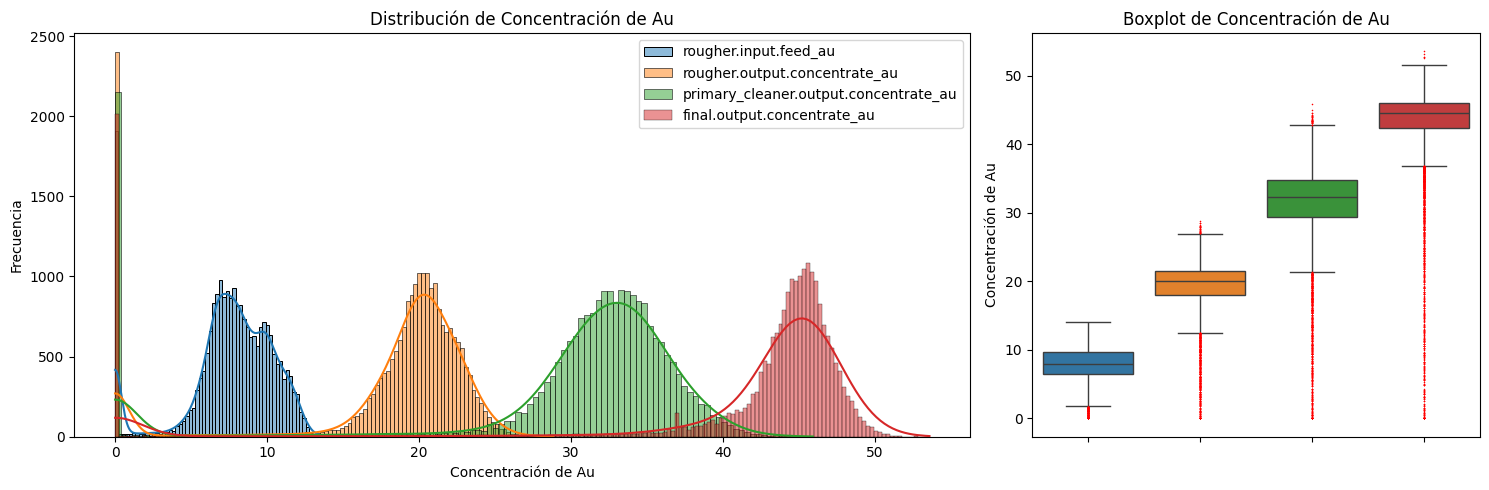

In [36]:
graficar_concentraciones(gold_recovery_full, elementos["Oro"])

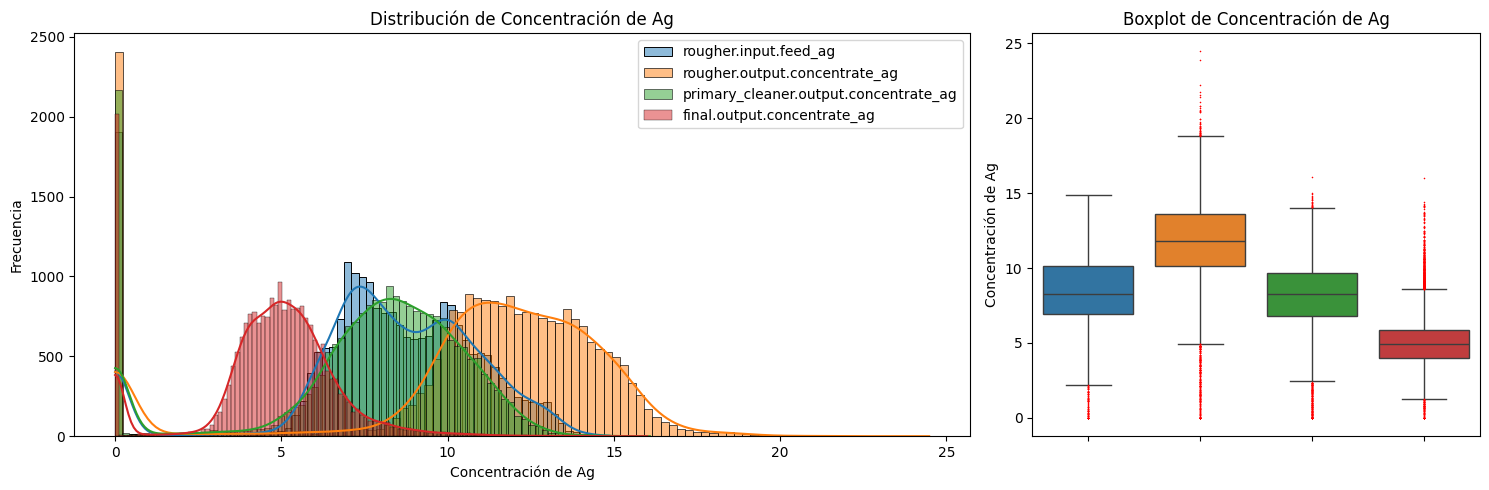

In [37]:
graficar_concentraciones(gold_recovery_full, elementos["Plata"])

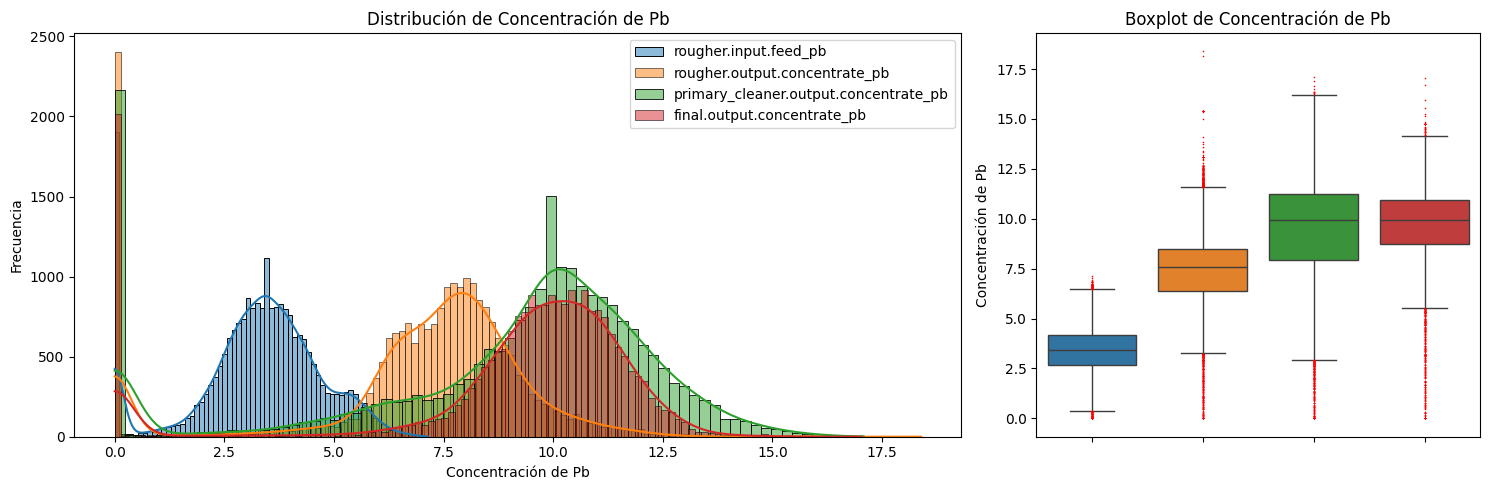

In [38]:
graficar_concentraciones(gold_recovery_full, elementos["Plomo"])

## Comparación en la distribución de tamaños de partículas

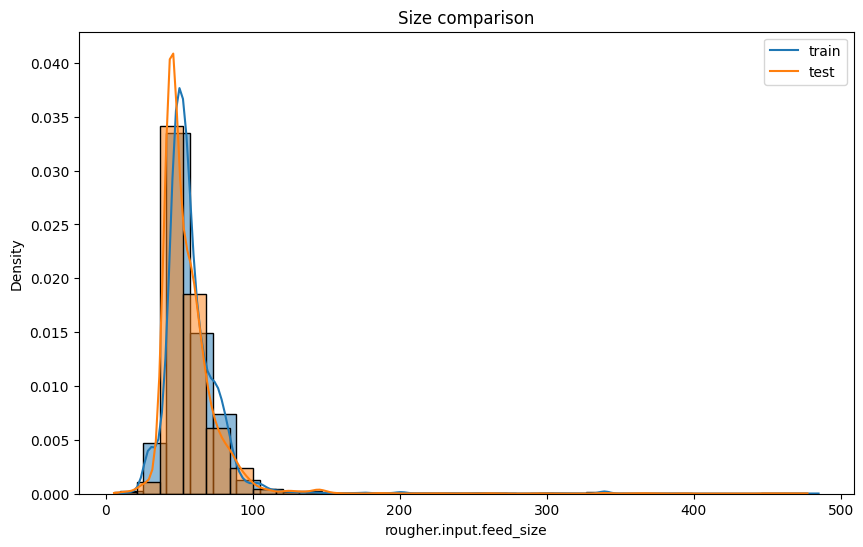

In [89]:
rougher_train_concentration = gold_recovery_train[gold_recovery_train['rougher.input.feed_size'] > 1] # Filtra el DataFrame de entrenamiento para tamaños de alimentación rougher mayores a 1.
rougher_test_concentration = gold_recovery_test[gold_recovery_test['rougher.input.feed_size'] > 1] # Filtra el DataFrame de prueba para tamaños de alimentación rougher mayores a 1.

plt.figure(figsize=(10, 6)) # Crea una nueva figura para el gráfico con un tamaño específico.
sns.histplot(rougher_train_concentration['rougher.input.feed_size'], bins=30, kde=True, stat='density', alpha=0.5) # Grafica la distribución del tamaño de la alimentación rougher en el conjunto de entrenamiento.
sns.histplot(rougher_test_concentration['rougher.input.feed_size'], bins=30, kde=True, stat='density', alpha=0.5) # Grafica la distribución del tamaño de la alimentación rougher en el conjunto de prueba.
plt.legend(['train', 'test']) # Añade una leyenda al gráfico.
plt.title('Size comparison') # Establece el título del gráfico.
plt.show() # Muestra el gráfico.

In [40]:
def plot_total_concentrations(df, columns):
    """
    Grafica la distribución y el boxplot de múltiples variables de concentración.

    Esta función genera, para cada columna especificada, dos visualizaciones:
    - Un histograma con curva KDE para analizar la distribución de los datos.
    - Un boxplot para evaluar la dispersión y la presencia de valores atípicos.

    Cada fila del gráfico corresponde a una variable distinta y se divide en
    dos subgráficos: distribución (izquierda) y boxplot (derecha).

    Parámetros:
        df (pd.DataFrame): DataFrame que contiene las variables de concentración.
        columns (list[str]): Lista de nombres de columnas a graficar.

    Retorna:
        None. La función muestra los gráficos en pantalla.
    """

    fig, axs = plt.subplots(
        len(columns),
        2,
        figsize=(15, 5 * len(columns)),
        gridspec_kw={'width_ratios': [2, 1]}
    )

    if len(columns) == 1:
        axs = [axs]

    for i, column in enumerate(columns):
        # Histograma con KDE
        sns.histplot(
            data=df,
            x=column,
            kde=True,
            ax=axs[i][0]
        )

        axs[i][0].set_title(f'Distribución de {column}')
        axs[i][0].set_xlabel(column)
        axs[i][0].set_ylabel('Frecuencia')

        # Boxplot
        sns.boxplot(
            data=df,
            y=column,
            ax=axs[i][1],
            flierprops=dict(
                marker='o',
                markersize=5,
                markerfacecolor='red',
                markeredgecolor='red'
            )
        )

        axs[i][1].set_title(f'Boxplot de {column}')
        axs[i][1].set_ylabel(column)

    plt.tight_layout()
    plt.show()

In [69]:
first = 'rougher.input.feed_' # Prefijo para columnas de alimentación inicial.
second = 'rougher.output.concentrate_' # Prefijo para columnas de concentrado rougher.
third = 'primary_cleaner.output.concentrate_' # Prefijo para columnas de concentrado de limpieza primaria.
fourth = 'final.output.concentrate_' # Prefijo para columnas de concentrado final.

In [99]:
gold_recovery_full['raw_material'] = gold_recovery_full[[first+'au', first+'ag', first+'pb']].sum(axis=1) # Calcula la concentración total de metales en la materia prima.
gold_recovery_full['draft_concentrate'] = gold_recovery_full[[second+'au', second+'ag', second+'pb']].sum(axis=1) # Calcula la concentración total de metales en el concentrado bruto.
gold_recovery_full['concentrate_after_filtering'] = gold_recovery_full[[third+'au', third+'ag', third+'pb']].sum(axis=1) # Calcula la concentración total de metales después del filtrado.
gold_recovery_full['final_concentrate'] = gold_recovery_full[[fourth+'au', fourth+'ag', fourth+'pb']].sum(axis=1) # Calcula la concentración total de metales en el concentrado final.

gold_recovery_train['raw_material'] = gold_recovery_train[[first+'au', first+'ag', first+'pb']].sum(axis=1)
gold_recovery_train['draft_concentrate'] = gold_recovery_train[[second+'au', second+'ag', second+'pb']].sum(axis=1)
gold_recovery_train['concentrate_after_filtering'] = gold_recovery_train[[third+'au', third+'ag', third+'pb']].sum(axis=1)
gold_recovery_train['final_concentrate'] = gold_recovery_train[[fourth+'au', fourth+'ag', fourth+'pb']].sum(axis=1)

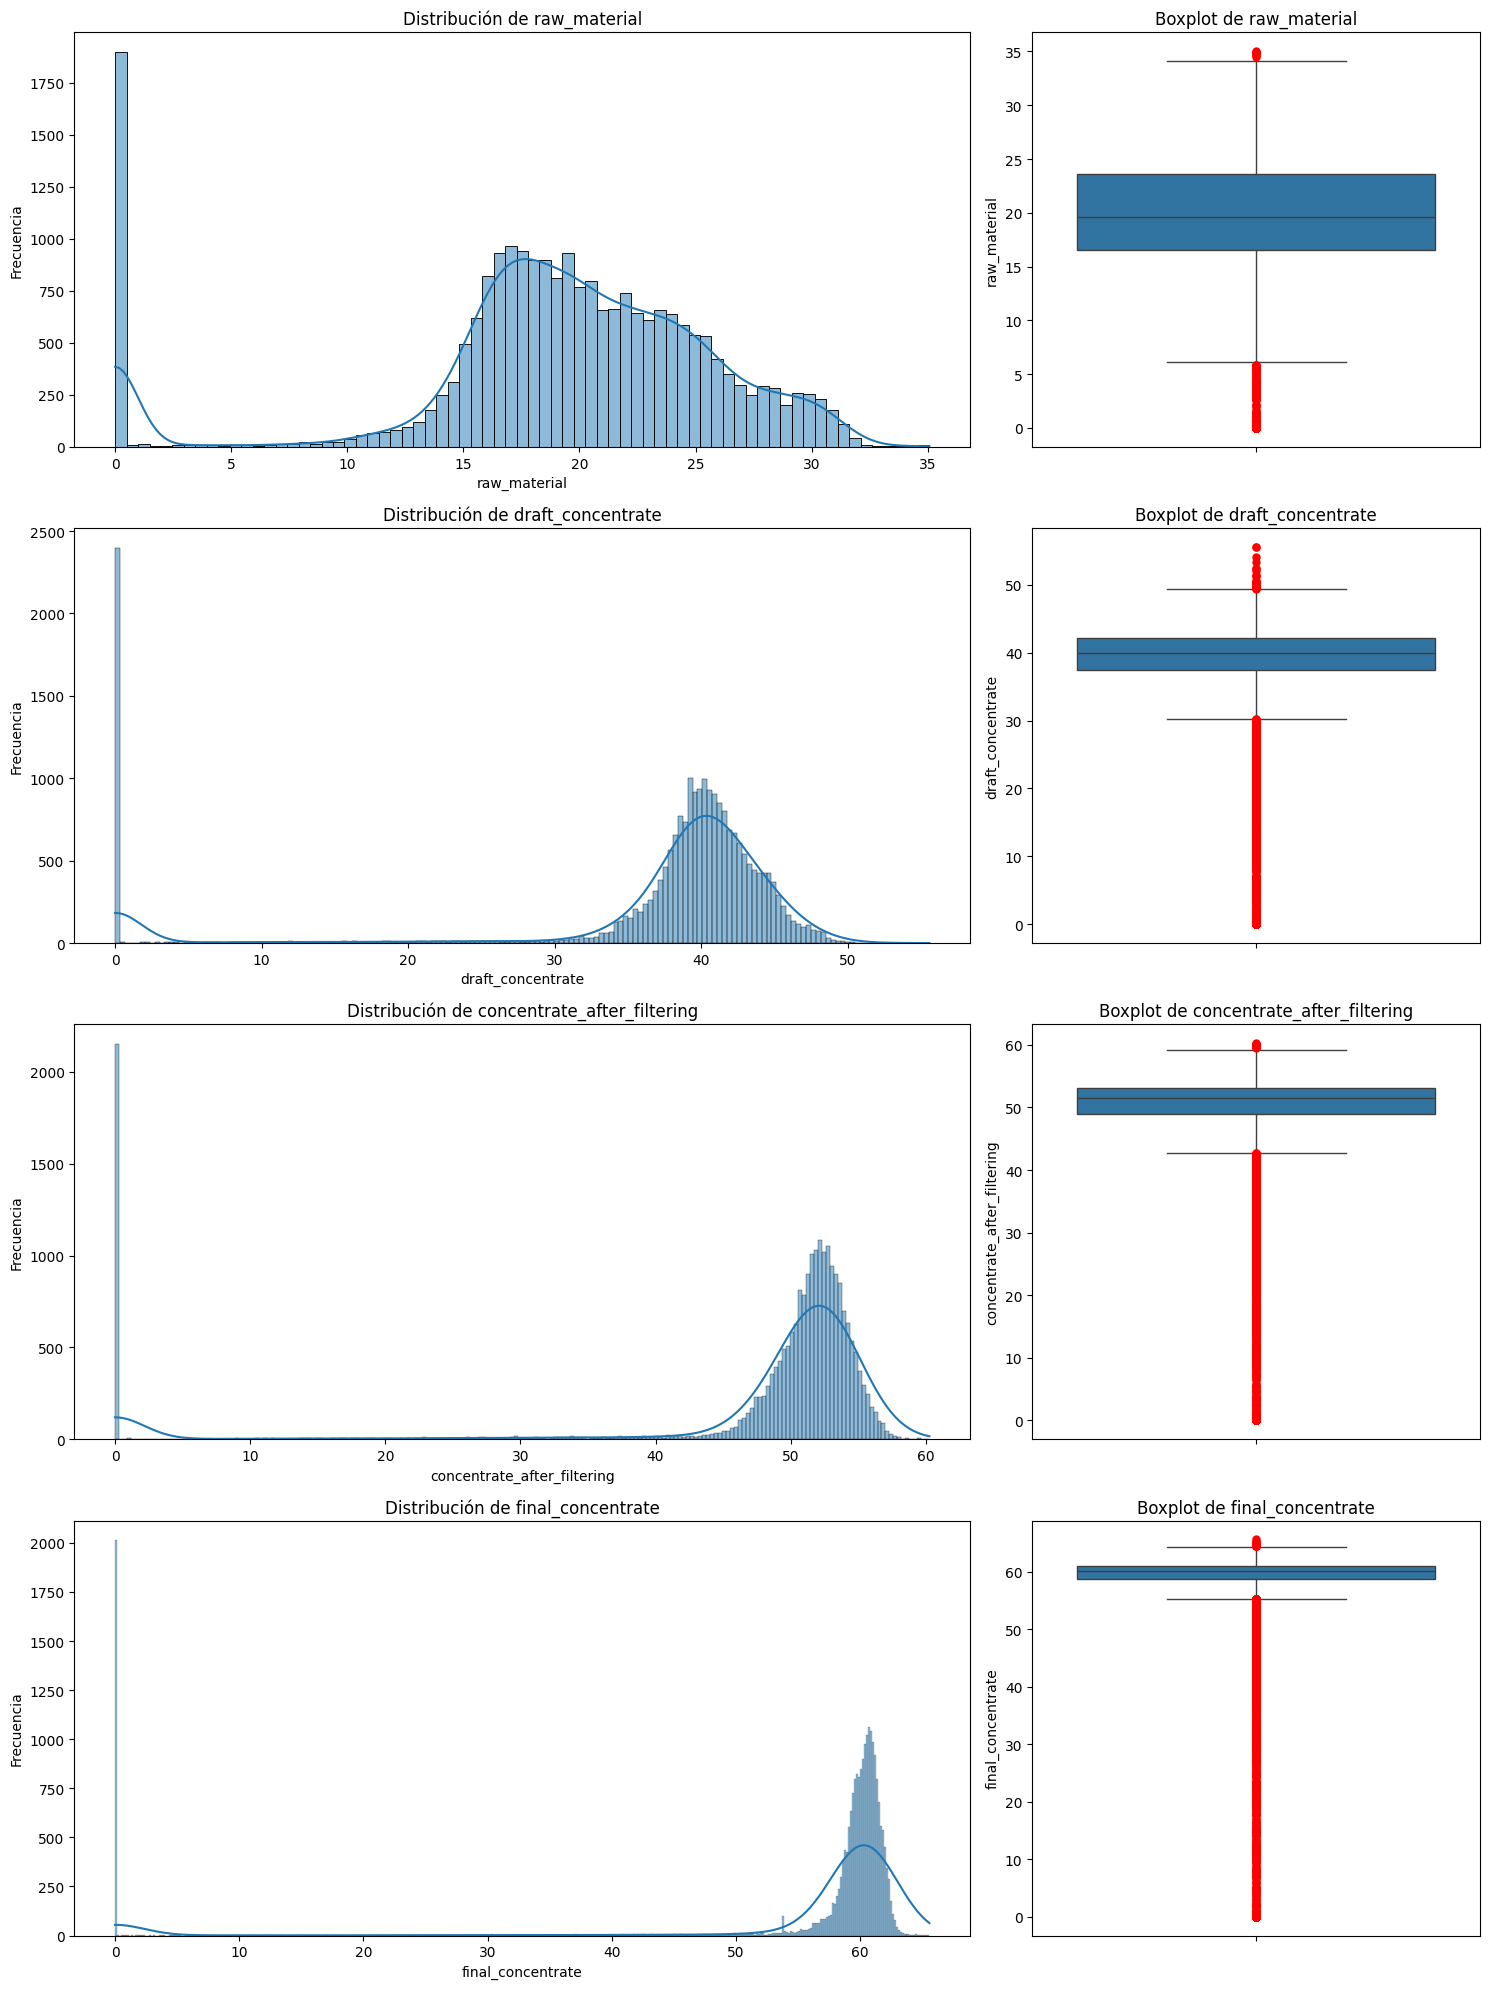

In [71]:
total_concentration_columns = [
    'raw_material',
    'draft_concentrate',
    'concentrate_after_filtering',
    'final_concentrate'
] # Define una lista con los nombres de las columnas de concentración total.

plot_total_concentrations(gold_recovery_full, total_concentration_columns) # Llama a la función para graficar las concentraciones totales.

# Seccion 3

In [7]:
def sMAPE(actual, predicted):
    """
    Calcula el Symmetric Mean Absolute Percentage Error (sMAPE).

    Esta métrica evalúa el error relativo entre los valores reales y los valores
    predichos, normalizando la diferencia absoluta por la magnitud conjunta de
    ambos valores. El resultado se expresa como un porcentaje, siendo robusto
    frente a escalas distintas y valores extremos.

    La fórmula utilizada es:
        sMAPE = (1 / n) * Σ [ 2 * |predicted - actual| / (|actual| + |predicted|) ] * 100

    Parámetros:
        actual (array-like): Valores reales observados.
        predicted (array-like): Valores estimados por el modelo.

    Retorna:
        float: Valor del sMAPE expresado en porcentaje.
    """

    return (
        (1 / len(actual))
        * np.sum(
            2 * np.abs(predicted - actual)
            / (np.abs(actual) + np.abs(predicted))
        )
        * 100
    )

In [8]:
def sMAPE_final(rougher_sMAPE, final_sMAPE):
    """
    Calcula el sMAPE final ponderado del proceso.

    Esta función combina el sMAPE de la etapa rougher y el sMAPE de la etapa final
    mediante un promedio ponderado, asignando mayor peso a la etapa final del
    proceso, de acuerdo con el criterio definido.

    La fórmula utilizada es:
        sMAPE_final = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final

    Parámetros:
        rougher_sMAPE (float): Valor del sMAPE correspondiente a la etapa rougher.
        final_sMAPE (float): Valor del sMAPE correspondiente a la etapa final.

    Retorna:
        float: Valor del sMAPE final ponderado.
    """

    return (0.25 * rougher_sMAPE) + (0.75 * final_sMAPE)

In [72]:
resultado = gold_recovery_test.merge(
    gold_recovery_full[['date', 'rougher.output.recovery', 'final.output.recovery']],
    on=['date'],
    how='inner'
) # Combina el DataFrame de prueba con las recuperaciones del DataFrame completo basándose en la columna 'date'.

In [73]:
features_test = resultado.drop(['date'], axis=1) # Elimina la columna 'date' del DataFrame 'resultado' para crear el conjunto de características de prueba.
target_rougher_test = resultado['rougher.output.recovery'] # Extrae la columna 'rougher.output.recovery' como el objetivo rougher para la prueba.
target_final_test = resultado['final.output.recovery'] # Extrae la columna 'final.output.recovery' como el objetivo final para la prueba.

In [74]:
feat_columns_test = features_test.columns # Obtiene los nombres de las columnas de características del conjunto de prueba.

In [75]:
target_rougher_train = gold_recovery_train['rougher.output.recovery'] # Extrae la columna 'rougher.output.recovery' como el objetivo rougher para el entrenamiento.
target_final_train = gold_recovery_train['final.output.recovery'] # Extrae la columna 'final.output.recovery' como el objetivo final para el entrenamiento.
features_train = gold_recovery_train[feat_columns_test] # Selecciona las columnas de características del conjunto de entrenamiento que coinciden con las del conjunto de prueba.

In [76]:
print('features_train', features_train.shape) # Imprime las dimensiones del DataFrame de características de entrenamiento.
print('features_test', features_test.shape) # Imprime las dimensiones del DataFrame de características de prueba.

features_train (16860, 54)
features_test (5856, 54)


In [49]:
# Selecciona solo las columnas numéricas para el escalado.
numeric_cols = features_train.select_dtypes(include=np.number).columns

# Inicializa el escalador estándar.
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma ambos conjuntos.
features_train.loc[:, numeric_cols] = scaler.fit_transform(features_train[numeric_cols])
features_test.loc[:, numeric_cols] = scaler.transform(features_test[numeric_cols])

In [50]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,-0.058868,0.434939,-0.076371,0.356368,0.074534,0.088799,0.071877,-0.113698,0.089199,0.106863,...,-0.447822,-0.313962,-0.858842,0.024974,-0.691581,-0.018427,-0.616338,-1.093005,0.307148,0.288305
1,-0.092421,0.482105,-0.076371,0.390559,0.144053,0.063106,0.136259,0.093630,0.155150,0.098629,...,-0.472795,-0.275998,-0.842177,0.000754,-0.706877,-0.019784,-0.638393,-1.014360,0.288166,0.176545
2,-0.133926,0.768549,-0.076371,0.362532,0.210934,0.074802,0.200429,0.084330,0.220821,0.078885,...,-0.479104,-0.273775,-0.837532,0.001286,-0.702184,-0.018995,-0.634023,-1.035664,0.288098,0.075764
3,-0.169472,0.770194,-0.076371,0.375991,0.206752,0.062503,0.201145,0.095997,0.216530,0.080689,...,-0.464601,-0.274451,-0.852281,0.013365,-0.708075,-0.015802,-0.637355,-1.017074,0.315665,0.096021
4,-0.267694,0.936292,-0.076371,0.408280,0.210363,0.087983,0.203190,0.087897,0.214706,0.078656,...,-0.472370,-0.272883,-0.858831,-0.018998,-0.721465,-0.017024,-0.638639,-1.036565,0.277081,-0.028494


In [77]:
random_state = 123 # Define una semilla para la reproducibilidad de los resultados aleatorios.
cv = 5 # Define el número de divisiones para la validación cruzada.

In [66]:
elementos = {
    "Oro": "au",
    "Plata": "ag",
    "Plomo": "pb"
} # Diccionario para mapear nombres de metales a sus abreviaturas.

In [78]:
models = [DecisionTreeRegressor(random_state = random_state),
          RandomForestRegressor(random_state=random_state),
          LinearRegression()] # Define una lista de modelos a evaluar.

In [79]:
results_cross_val = [] # Inicializa una lista vacía para almacenar los resultados de la validación cruzada.

for model in models: # Itera sobre cada modelo en la lista 'models'.

    scorer = make_scorer(sMAPE, greater_is_better=False) # Crea un objeto scorer personalizado utilizando la función sMAPE, donde un valor más bajo es mejor.

    cross_val_score_rougher = cross_val_score(model,
                                              features_train,
                                              target_rougher_train,
                                              cv=cv, scoring=scorer).mean() # Realiza validación cruzada para el sMAPE rougher y calcula la media de los resultados.
    cross_val_score_final = cross_val_score(model,
                                            features_train,
                                            target_final_train,
                                            cv=cv, scoring=scorer).mean() # Realiza validación cruzada para el sMAPE final y calcula la media de los resultados.

    results_cross_val.append({'model name': model.__class__.__name__,
                              'cross_val_score_rougher': cross_val_score_rougher,
                              'cross_val_score_final': cross_val_score_final}) # Añade los resultados del modelo a la lista.

pd.DataFrame(results_cross_val) # Convierte la lista de resultados en un DataFrame para su visualización.

,model name,cross_val_score_rougher,cross_val_score_final
0,DecisionTreeRegressor,-0.148364,-0.084687
1,RandomForestRegressor,-2.398726,-0.682774
2,LinearRegression,-3.795967,-1.055753


In [80]:
results = [] # Inicializa una lista vacía para almacenar los resultados de la búsqueda de hiperparámetros.

for depth in range(1,5): # Itera sobre diferentes valores para la profundidad máxima del árbol.

    for estimator in range(10, 21, 5): # Itera sobre diferentes valores para el número de estimadores (árboles).

        model = RandomForestRegressor(random_state=random_state,
                                       n_estimators=estimator,
                                       max_depth=depth) # Crea un modelo RandomForestRegressor con los hiperparámetros actuales.

        scorer = make_scorer(sMAPE, greater_is_better=False) # Crea un objeto scorer personalizado utilizando la función sMAPE.

        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=cv, scoring=scorer).mean() # Realiza validación cruzada para el sMAPE rougher.
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=cv, scoring=scorer).mean() # Realiza validación cruzada para el sMAPE final.

        smape_final_result = sMAPE_final(cross_val_score_rougher, cross_val_score_final) # Calcula el sMAPE final ponderado.

        results.append({'model name': model.__class__.__name__,
                        'Hyperparameters': {'random_state': random_state,
                                            'n_estimators': estimator,
                                            'max_depth':depth},
                        'smape_final_result': smape_final_result}) # Añade los resultados a la lista.

In [81]:
df = pd.json_normalize(results) # Normaliza los resultados en un DataFrame.

df.style.highlight_max(subset='smape_final_result', axis=0, color="green") # Resalta el mejor resultado del sMAPE final.

,model name,smape_final_result,Hyperparameters.random_state,Hyperparameters.n_estimators,Hyperparameters.max_depth
0,RandomForestRegressor,-9.480479,123,10,1
1,RandomForestRegressor,-9.516680,123,15,1
2,RandomForestRegressor,-9.543524,123,20,1
3,RandomForestRegressor,-7.379898,123,10,2
4,RandomForestRegressor,-7.372909,123,15,2
5,RandomForestRegressor,-7.384548,123,20,2
6,RandomForestRegressor,-4.466714,123,10,3
7,RandomForestRegressor,-4.428118,123,15,3
8,RandomForestRegressor,-4.413511,123,20,3
9,RandomForestRegressor,-2.978701,123,10,4


# Modelo Final con mejores hiperparámetros


In [82]:
model_final = RandomForestRegressor(random_state=random_state,
                                     n_estimators=20,
                                     max_depth=4) # Define el modelo final RandomForestRegressor con los mejores hiperparámetros encontrados.

In [83]:
model_final.fit(features_train, target_rougher_train) # Entrena el modelo final para predecir la recuperación rougher.

RandomForestRegressor(max_depth=4, n_estimators=20, random_state=123)

In [84]:
rough_predictions = model_final.predict(features_test) # Realiza predicciones de la recuperación rougher en el conjunto de prueba.

In [85]:
model_final.fit(features_train, target_final_train) # Entrena el modelo final para predecir la recuperación final.

RandomForestRegressor(max_depth=4, n_estimators=20, random_state=123)

In [86]:
final_predictions = model_final.predict(features_test) # Realiza predicciones de la recuperación final en el conjunto de prueba.

In [87]:
rough_sMAPE = sMAPE(target_rougher_test, rough_predictions) # Calcula el sMAPE para la etapa rougher.
final_sMAPE = sMAPE(target_final_test, final_predictions) # Calcula el sMAPE para la etapa final.

In [88]:
print(f'sMAPE Rougher: {rough_sMAPE}') # Imprime el valor del sMAPE para la etapa rougher.
print(f'sMAPE Final: {final_sMAPE}') # Imprime el valor del sMAPE para la etapa final.

print(f'sMAPE Final: {sMAPE_final(rough_sMAPE, final_sMAPE)}') # Imprime el sMAPE final ponderado.

sMAPE Rougher: 4.361028105358848
sMAPE Final: 3.2149942710815185
sMAPE Final: 3.5015027296508507
